In [2]:
library(ggplot2)
library(dplyr)

pf <- read.csv('pseudo_facebook.tsv', sep = '\t')
head(pf)

userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
2094382,14,19,1999,11,male,266,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82,0,0,0,0,0,0,0,0
1524765,14,1,1999,12,male,15,0,0,0,0,0,0,0,0


In [3]:
?cor.test

cor.test {stats},R Documentation
"x, y",numeric vectors of data values. x and y must have the same length.
alternative,"indicates the alternative hypothesis and must be one of ""two.sided"", ""greater"" or ""less"". You can specify just the initial letter. ""greater"" corresponds to positive association, ""less"" to negative association."
method,"a character string indicating which correlation coefficient is to be used for the test. One of ""pearson"", ""kendall"", or ""spearman"", can be abbreviated."
exact,a logical indicating whether an exact p-value should be computed. Used for Kendall's tau and Spearman's rho. See ‘Details’ for the meaning of NULL (the default).
conf.level,confidence level for the returned confidence interval. Currently only used for the Pearson product moment correlation coefficient if there are at least 4 complete pairs of observations.
continuity,"logical: if true, a continuity correction is used for Kendall's tau and Spearman's rho when not computed exactly."
formula,"a formula of the form ~ u + v, where each of u and v are numeric variables giving the data values for one sample. The samples must be of the same length."
data,an optional matrix or data frame (or similar: see model.frame) containing the variables in the formula formula. By default the variables are taken from environment(formula).
subset,an optional vector specifying a subset of observations to be used.
na.action,"a function which indicates what should happen when the data contain NAs. Defaults to getOption(""na.action"")."


In [4]:
cor.test(pf$age, pf$friend_count, method = 'pearson')


	Pearson's product-moment correlation

data:  pf$age and pf$friend_count
t = -8.6268, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03363072 -0.02118189
sample estimates:
        cor 
-0.02740737 


In [5]:
## There is no mean correlation between the 2 variables

In [7]:
with(pf, cor.test(pf$age, pf$friend_count, method = 'pearson'))


	Pearson's product-moment correlation

data:  pf$age and pf$friend_count
t = -8.6268, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03363072 -0.02118189
sample estimates:
        cor 
-0.02740737 


In [9]:
with(subset(pf, age <= 70), cor.test(pf$age, pf$friend_count))


	Pearson's product-moment correlation

data:  pf$age and pf$friend_count
t = -8.6268, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.03363072 -0.02118189
sample estimates:
        cor 
-0.02740737 


Warning message:
"Removed 6075 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 6075 rows containing missing values (geom_point)."

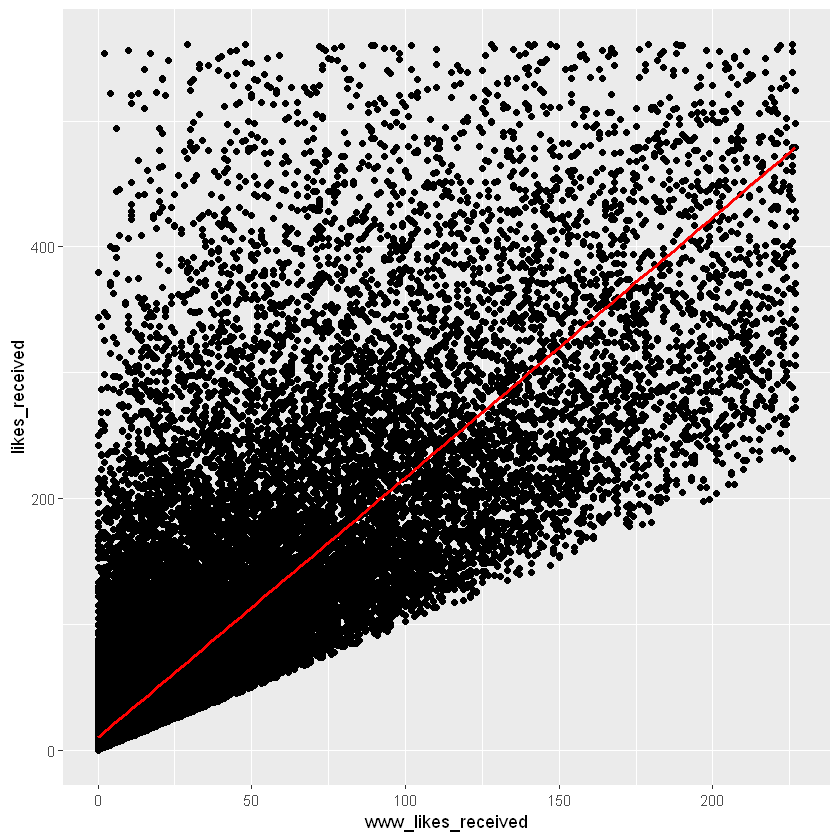

In [12]:
ggplot(aes(x = www_likes_received, y = likes_received), data = pf) + 
    geom_point() +
    xlim(0, quantile(pf$www_likes_received, 0.95)) +
    ylim(0, quantile(pf$likes_received, 0.95)) +
    geom_smooth(method = 'lm', color = 'red')

In [13]:
with(pf, cor.test(pf$www_likes_received, pf$likes_received, method = 'pearson'))


	Pearson's product-moment correlation

data:  pf$www_likes_received and pf$likes_received
t = 937.1, df = 99001, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9473553 0.9486176
sample estimates:
      cor 
0.9479902 


In [14]:
install.packages('alr3')

Installing package into 'C:/Users/m_rod/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
also installing the dependencies 'rematch', 'forcats', 'hms', 'readr', 'cellranger', 'zip', 'SparseM', 'MatrixModels', 'sp', 'haven', 'data.table', 'readxl', 'openxlsx', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'car'



package 'rematch' successfully unpacked and MD5 sums checked
package 'forcats' successfully unpacked and MD5 sums checked
package 'hms' successfully unpacked and MD5 sums checked
package 'readr' successfully unpacked and MD5 sums checked
package 'cellranger' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'readxl' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'carData' successfully 

In [16]:
# This programming assignment
# will not be graded, but when you
# submit your code, the assignment
# will be marked as correct. By submitting
# your code, we can add to the feedback
# messages and address common mistakes
# in the Instructor Notes.

# You can assess your work by watching
# the solution video.


# Create a scatterplot of temperature (Temp)
# vs. months (Month).

# ENTER ALL OF YOUR CODE TO CREATE THE PLOT BELOW THIS LINE.
# ===========================================================

library(alr3)
data(Mitchell)

In [17]:
?Mitchell

Mitchell {alr3},R Documentation


In [18]:
head(Mitchell)

Month,Temp
0,-5.18333
1,-1.65000
2,2.49444
3,10.40000
4,14.99440
5,21.71670


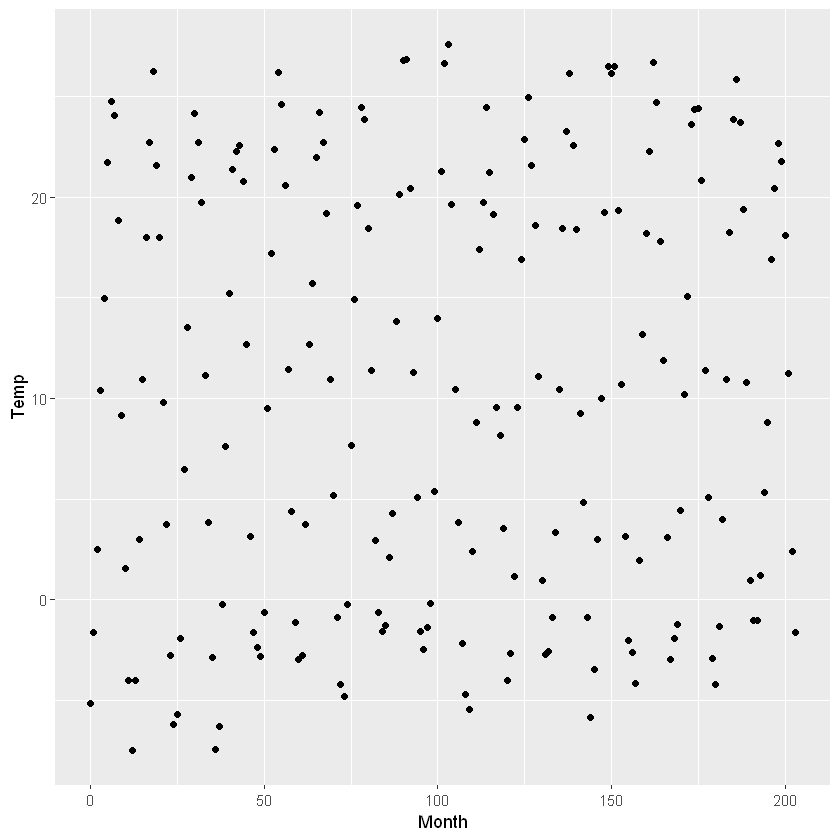

In [19]:
## Scaterrplot Temp vs Month
ggplot(aes(x = Month, y = Temp), data = Mitchell) + geom_point()

# Noisy Scatterplots

In [20]:
with(pf, cor.test(Mitchell$Month, Mitchell$Temp, method = 'pearson'))


	Pearson's product-moment correlation

data:  Mitchell$Month and Mitchell$Temp
t = 0.81816, df = 202, p-value = 0.4142
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08053637  0.19331562
sample estimates:
       cor 
0.05747063 


In [21]:
# Take a guess of the correlation coefficient for the scatterplot?
# 0      -2 to 2

# Making Sense of Data

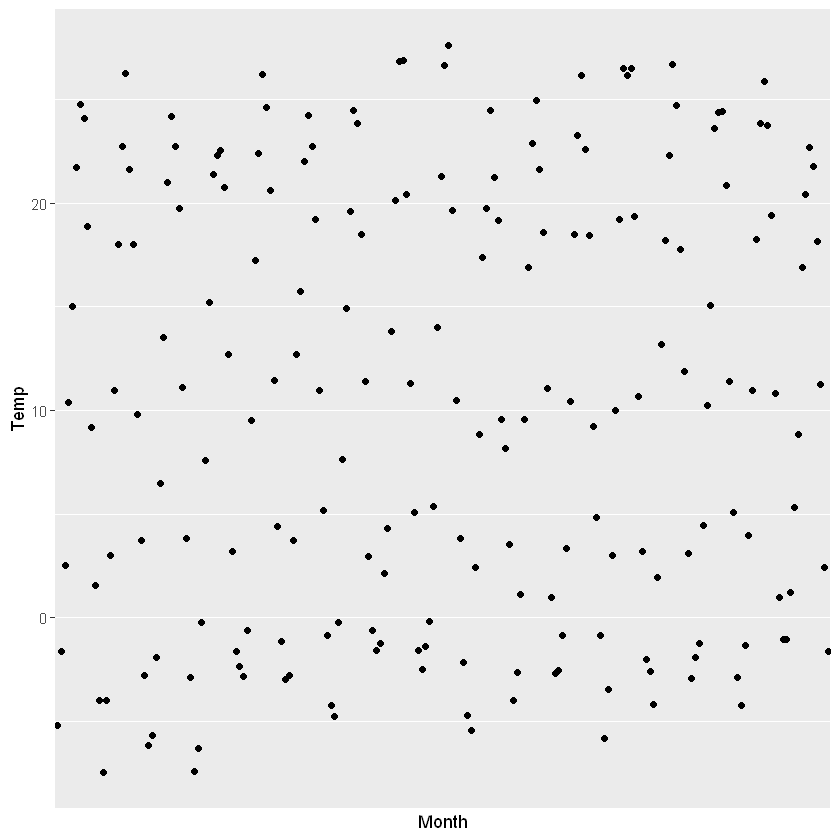

In [25]:
ggplot(aes(x = Month, y = Temp), data = Mitchell) + 
    geom_point() +
    scale_x_discrete(breaks = seq(0, 203, 11))

# Understanding Noise: Age to Age Months

In [26]:
age_groups <- group_by(pf, age)
pf.fc_by_age <- summarise(age_groups,
              friend_count_mean = mean(friend_count),
              friend_count_median = median(friend_count),
              n = n())

In [27]:
pf.fc_by_age <- arrange(pf.fc_by_age, age)

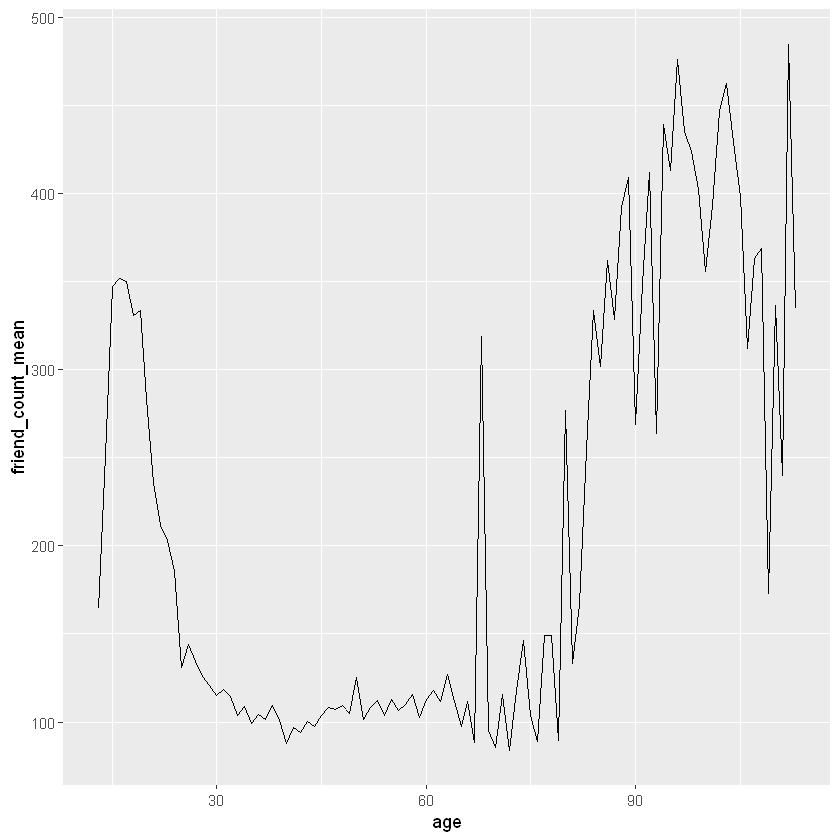

In [28]:
ggplot(aes(age, friend_count_mean), data = pf.fc_by_age) + geom_line()

In [29]:
pf$age_with_months <- pf$age + (12 - pf$dob_month) / 12

# Age with Months Means

In [31]:
age_with_months <- group_by(pf, age)
pf.fc_by_age_months <- summarise(age_with_months,
                          friend_count_mean = mean(friend_count),
                          friend_count_median = median(friend_count),
                          n = n())
pf.fc_by_age <- arrange(pf.fc_by_age_months, age)
head(pf.fc_by_age_months)

age,friend_count_mean,friend_count_median,n
13,164.7500,74.0,484
14,251.3901,132.0,1925
15,347.6921,161.0,2618
16,351.9371,171.5,3086
17,350.3006,156.0,3283
18,331.1663,162.0,5196
